In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import os,errno
import sys
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import pandas as pd
import datetime as dt
from scipy.ndimage.measurements import label
from math import sin, cos, sqrt, atan2, radians
import geopy.distance
%matplotlib inline

dir2='/thorncroftlab_rit/ahenny/rain/'
dir1='/thorncroftlab_rit/ahenny/rain/US/ghcnd_all/'
dir='/thorncroftlab_rit/ahenny/rain/DISSERTATION_SCRIPTS_RESULTS/'

#This script plots frequency of EP days per year and individual EP day precipitation

In [31]:
#ds1=xr.open_dataset(dir+'extreme_days_ghcnd_99station_80area95.nc')
if 1==1:
    ds1.close()
thresh_choose=95
area_threshold_choose=95
season_choose='summer'

ds1=xr.open_dataset(dir+'extreme_days_ghcnd_'+str(thresh_choose)+'_'+str(area_threshold_choose)+'_'+season_choose+'.nc')
lats=ds1['lats'].values.tolist()
lons=ds1['lons'].values.tolist()
lons=[x+360. for x in lons]
dates=ds1['dates'].values
dates_unique=list(set(dates))
dates_unique=pd.DatetimeIndex(dates_unique).sort_values()
stations=ds1['stations'].values.tolist()
obs=ds1['obs'].values.tolist()
print(dates_unique)

DatetimeIndex(['1979-08-12 06:00:00', '1980-07-29 06:00:00',
               '1982-06-02 06:00:00', '1982-06-05 06:00:00',
               '1982-06-06 06:00:00', '1982-06-13 06:00:00',
               '1982-07-28 06:00:00', '1983-08-12 06:00:00',
               '1984-06-18 06:00:00', '1984-07-07 06:00:00',
               ...
               '2017-07-24 06:00:00', '2017-07-29 06:00:00',
               '2018-06-22 06:00:00', '2018-07-21 06:00:00',
               '2018-07-22 06:00:00', '2018-07-25 06:00:00',
               '2018-08-04 06:00:00', '2019-06-21 06:00:00',
               '2019-07-23 06:00:00', '2019-08-08 06:00:00'],
              dtype='datetime64[ns]', length=132, freq=None)


In [32]:
yrs=np.arange(1979,2020,1)
zipped=list(zip(dates,obs,lats,lons))
zipped_coords=list(zip(lats,lons))
coords_unique=list(set(zipped_coords))
mean_obs_day_list=[]
max_obs_day_list=[]
for i in range(len(dates_unique)):
    date=dates_unique[i]
    select_day=[x for x in zipped if x[0]==date]
    obs_day=[x[1] for x in select_day]
    mean_obs_day=float(sum(obs_day))/float(len(select_day))
    mean_obs_day_list.append(mean_obs_day)
    max_obs_day_list.append(max(obs_day))
    
    if 1==1:#testing for locations that are not reporting
        rainy_day_lats=[x[2] for x in select_day]
        rainy_day_lons=[x[3] for x in select_day]
        coords_day=list(zip(rainy_day_lats,rainy_day_lons))
        left_out=[x for x in coords_unique if x not in coords_day]
        print(len(left_out))

years=[x.year for x in dates_unique]
zipped_dates=list(zip(years,mean_obs_day_list,max_obs_day_list))
intensity_year_list=[]
frequency_year_list=[]
max_year_list=[]
for i in range(len(yrs)):
    year=yrs[i]
    select_totals=[x for x in zipped_dates if x[0]==year]
    frequency_year=len(select_totals)
    totals_year=[x[1] for x in select_totals]
    max_year=[x[2] for x in select_totals]
    if frequency_year>0:
        intensity_year=float(sum(totals_year))/float(len(totals_year))
        intensity_year_list.append(intensity_year)
        max_year_list.append(max(max_year))
    else:
        intensity_year_list.append(np.nan)
        max_year_list.append(np.nan)
    frequency_year_list.append(frequency_year)
print(frequency_year_list)
print(intensity_year_list)
print(max_year_list)

4
1
2
2
2
4
4
3
6
7
5
7
6
7
5
5
5
2
3
3
4
8
2
2
5
6
4
5
3
2
4
3
5
3
4
7
4
4
4
4
12
7
5
6
7
6
8
7
4
5
4
4
5
4
6
4
5
4
9
6
6
3
3
7
7
2
3
3
2
3
6
7
8
8
4
5
4
7
8
7
6
4
2
5
4
4
6
3
2
4
5
3
4
4
15
13
8
15
15
14
13
1
2
3
2
5
3
8
4
1
2
1
2
2
5
4
5
10
9
3
4
7
9
5
5
3
4
5
6
2
3
1
[1, 1, 0, 5, 1, 3, 3, 2, 1, 4, 3, 4, 4, 4, 0, 4, 1, 7, 2, 4, 2, 3, 3, 1, 3, 8, 3, 5, 1, 3, 4, 4, 6, 1, 7, 6, 6, 1, 3, 5, 3]
[19.729032258064503, 12.160702875399364, nan, 16.00953515301903, 17.09549839228296, 12.861448123662322, 11.82014009334857, 14.7279935275081, 10.954692556634322, 14.95540696418076, 11.668376068376077, 13.342802850662238, 16.62790172979185, 12.589862779829865, nan, 17.066854838709684, 17.492715231788075, 14.517854405232002, 12.297195427497652, 15.798521505376353, 12.509065772936744, 12.069133304467833, 12.524265043638039, 15.325080385852095, 12.872861507837086, 13.111798399932537, 15.88672651981767, 17.001948975237443, 14.398717948717959, 13.878930298917771, 13.071946505742478, 13.00074957478327, 16

In [5]:
#@author: Michael Schramm on GitHub
#This function is derived from code originally posted by Sat Kumar Tomer
#(satkumartomer@gmail.com)
#See also: http://vsp.pnnl.gov/help/Vsample/Design_Trend_Mann_Kendall.htm

from scipy.stats import norm
import scipy.stats as st
def mk_test(x, alpha=0.05):
    n = len(x)

    # calculate S
    s = 0
    for k in range(n-1):
        for j in range(k+1, n):
            s += np.sign(x[j] - x[k])

    # calculate the unique data
    unique_x, tp = np.unique(x, return_counts=True)
    g = len(unique_x)

    # calculate the var(s)
    if n == g:  # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18
    else:  # there are some ties in data
        var_s = (n*(n-1)*(2*n+5) - np.sum(tp*(tp-1)*(2*tp+5)))/18

    if s > 0:
        z = (s - 1)/np.sqrt(var_s)
    elif s < 0:
        z = (s + 1)/np.sqrt(var_s)
    else: # s == 0:
        z = 0

    # calculate the p_value
    p = 2*(1-norm.cdf(abs(z)))  # two tail test
    h = abs(z) > norm.ppf(1-alpha/2)

    if (z < 0) and h:
        trend = 'decreasing'
    elif (z > 0) and h:
        trend = 'increasing'
    else:
        trend = 'no trend'

    return trend, h, p, z

LinregressResult(slope=-0.011893155112604312, intercept=38.054211188993726, rvalue=-0.0346809336520619, pvalue=0.6930033246658203, stderr=0.03005891438574495)
(0.05555555555555555, -108.05555555555554, 0.0, 0.1111111111111111)
(-0.016065360044911475, 46.009650388740724, -0.0885553787711719, 0.05411954979120145)
(0.8090909090909096, -1480.7818181818193, -0.5285714285714279, 2.2958333333333343)


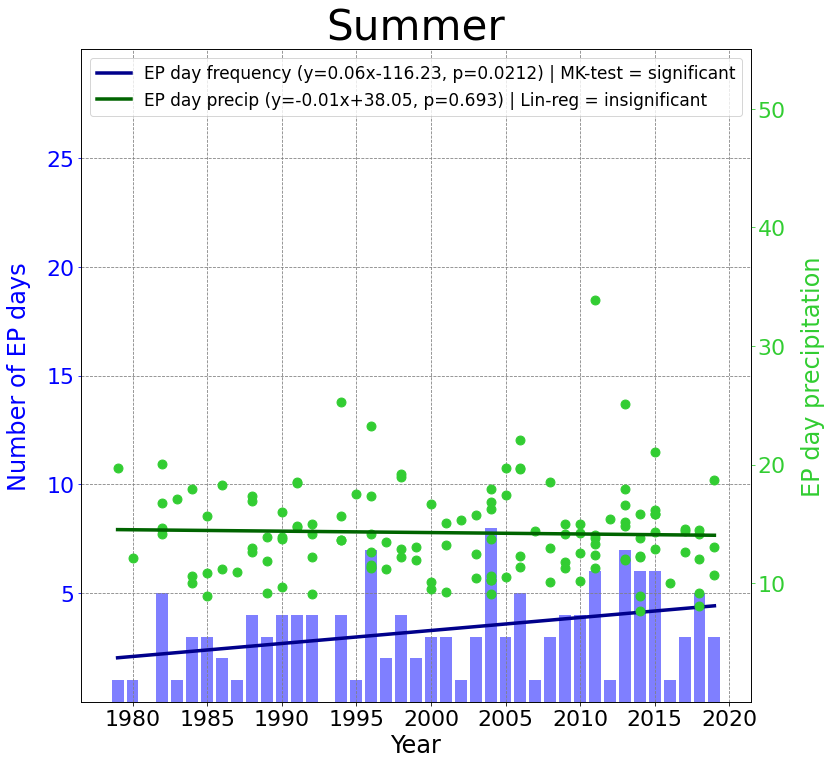

In [33]:
int_masked=np.ma.masked_array(intensity_year_list, mask=np.isnan(intensity_year_list))
max_masked=np.ma.masked_array(max_year_list, mask=np.isnan(max_year_list))

zip_mask=list(zip(yrs,frequency_year_list,intensity_year_list,max_year_list))
years_present=[x[0] for x in zip_mask if x[2]>=0]
int_present=[x[2] for x in zip_mask if x[2]>=0]
max_present=[x[3] for x in zip_mask if x[2]>=0]

mk1=mk_test(frequency_year_list,alpha=0.05)


line_freq=st.linregress(yrs,frequency_year_list)
line_extr=st.linregress(years,mean_obs_day_list)
print(line_extr)

slope_freq=st.theilslopes(frequency_year_list,yrs,alpha=0.95)
slope_int=st.theilslopes(int_present,years_present,alpha=0.95)
slope_max=st.theilslopes(max_present,years_present,alpha=0.95)
print(slope_freq)
print(slope_int)
print(slope_max)

if mk1[0] in ['increasing','decreasing']:
    mk1_str='MK-test = significant'
else:
    mk1_str='MK-test = insignificant'
    
if line_extr[3]<=0.05:
    line2_str='Lin-reg = significant'
else:
    line2_str='Lin-reg = insignificant'

if line_extr[1]<0:
    eq_1='y='+str(round(line_extr[0],2))+'x-'+str(round(abs(line_extr[1]),2))+', p='+str(round(line_extr[3],4))
else:
    eq_1='y='+str(round(line_extr[0],2))+'x+'+str(round(line_extr[1],2))+', p='+str(round(line_extr[3],4))
    
if line_freq[1]<0:
    eq_2='y='+str(round(line_freq[0],2))+'x-'+str(round(abs(line_freq[1]),2))+', p='+str(round(line_freq[3],4))
else:
    eq_2='y='+str(round(line_freq[0],2))+'x+'+str(round(line_freq[1],2))+', p='+str(round(line_freq[3],4))

label_2='EP day frequency ('+eq_2+') | '+mk1_str
label_1='EP day precip ('+eq_1+') | '+line2_str

fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)
ax.tick_params(labelsize=22)
ax.set_title('Summer',fontsize=42,pad=10)
ax.set_ylabel('Number of EP days',labelpad=15,color='b',fontsize=24)
ax.bar(yrs,frequency_year_list,color='b',alpha=0.5)

plt.grid(True,color='grey',linestyle='--')
ax.set_ylim(0,30)
ax.set_xlabel('Year',fontsize=24)
ax.tick_params(axis='y',color='b')
plt.setp(ax.get_yticklabels(), color='b')
ax.set_yticks([5,10,15,20,25])
lns1=ax.plot(yrs,[x*line_freq[0]+line_freq[1] for x in yrs],color='darkblue',linewidth=3.5,label=label_2)
ax1=ax.twinx()
ax1.scatter(years,mean_obs_day_list,c='limegreen',s=80)
lns2=ax1.plot(yrs,[x*line_extr[0]+line_extr[1] for x in yrs],color='darkgreen',linewidth=3.5,label=label_1)
ax1.set_yticks([10,20,30,40,50])
ax1.set_ylim(0,55)
ax1.tick_params(labelsize=22)
lns=lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left',fontsize=17)
ax1.tick_params(axis='y',color='limegreen')
plt.setp(ax1.get_yticklabels(), color='limegreen')
ax1.set_ylabel('EP day precipitation',labelpad=15,color='limegreen',fontsize=24)
plt.show()

In [34]:
fig.savefig(dir+'neusa_climo_precip_line_3.png')